# Overfitting

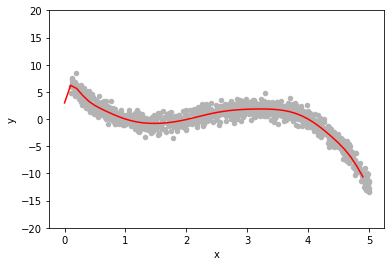

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures

# random data
x = np.random.uniform(0.1, 5, 1000)
noise = np.random.normal(scale=1, size=x.size)
y = (4-x)*(2-x)*(1-x) + noise
df = pd.DataFrame({"y":y, "x":x})

# add columns for polynomial terms
poly = PolynomialFeatures(15, include_bias=False)
columns = ["x"]
arr = poly.fit_transform(df[columns])
poly_df = pd.DataFrame(arr, columns=poly.get_feature_names(columns))

# linear regression
lr = LR()
lr.fit(poly_df, df[["y"]])
ax = df.plot.scatter(x="x", y="y", color="0.7", ylim=(-20, 20))

# compute coords along fit line, then plot it
fit_x = np.arange(0, 5, 0.1).reshape(-1,1)
fit_y = lr.predict(poly.fit_transform(fit_x))
ax.plot(fit_x, fit_y, "red")